In [1]:
import pandas as pd
import json
import numpy as np
import networkx as nx

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["figure.dpi"] = 150

In [3]:
metadata = pd.read_csv("../data/metadata.csv")
metadata

,title,doi,date_published,date_published_print,journal,publisher,citations,paper_type,n_authors
0,A Mass-Conservation Model for Stability Analys...,10.1109/TCSS.2021.3050476,2021-02-03T05:47:36Z,2021-8,IEEE Transactions on Computational Social Systems,Institute of Electrical and Electronics Engine...,1.0,journal-article,2.0
1,A Novel Intelligent Computational Approach to ...,10.1109/JBHI.2020.3027987,2020-09-30T20:09:12Z,2020-12,IEEE Journal of Biomedical and Health Informatics,Institute of Electrical and Electronics Engine...,4.0,journal-article,12.0
2,A SIR model assumption for the spread of COVID...,10.1016/j.chaos.2020.110057,2020-06-28T07:50:11Z,2020-10,"Chaos, Solitons & Fractals",Elsevier BV,134.0,journal-article,3.0
3,A SIR-type model describing the successive wav...,10.1016/j.chaos.2021.110682,2021-01-15T03:07:04Z,2021-3,"Chaos, Solitons & Fractals",Elsevier BV,4.0,journal-article,3.0
4,A Spatiotemporal Tool to Project Hospital Crit...,10.2105/AJPH.2021.306220,2021-04-15T20:02:20Z,2021-6,American Journal of Public Health,American Public Health Association,3.0,journal-article,12.0
...,...,...,...,...,...,...,...,...,...
132,Time-dependent heterogeneity leads to transien...,10.1073/PNAS.2015972118,2021-04-08T20:00:40Z,2021-4-27,Proceedings of the National Academy of Sciences,Proceedings of the National Academy of Sciences,16.0,journal-article,6.0
133,Time-variant reliability-based prediction of C...,10.1016/j.rinp.2021.104364,2021-06-02T07:34:05Z,2021-7,Results in Physics,Elsevier BV,1.0,journal-article,4.0
134,Timing social distancing to avert unmanageable...,10.1073/PNAS.2009033117,2020-07-30T00:15:37Z,2020-8-18,Proceedings of the National Academy of Sciences,Proceedings of the National Academy of Sciences,23.0,journal-article,6.0
135,"Weather, Mobility, and COVID-19: A Panel Local...",CorpusID:231674108,NaN,NaN,NaN,NaN,2.0,NaN,1.0


In [4]:
with open("../rawdata/references_metadata_raw.json", "r") as f:
    references_raw = json.load(f)

In [5]:
dois = list(metadata.doi)

In [6]:
references = {k: [x["doi"] for x in v if x["doi"]] for (k,v) in references_raw.items()}

In [7]:
references_internal = {k: [d for d in v if d in dois] for (k,v) in references.items()}

In [8]:
cited = [x for y in references.values() for x in y]

In [9]:
references_internal

{'10.1109/TCSS.2021.3050476': [],
 '10.1109/JBHI.2020.3027987': [],
 '10.1016/j.chaos.2020.110057': [],
 '10.1016/j.chaos.2021.110682': [],
 '10.2105/AJPH.2021.306220': [],
 '10.1016/j.isatra.2021.01.029': ['10.1016/j.chaos.2020.110023'],
 '10.1371/journal.pone.0236386': [],
 '10.1016/j.dss.2021.113630': [],
 '10.1007/s11071-020-05848-4': ['10.1007/s11071-020-05946-3'],
 '10.1038/s41598-021-91514-7': ['10.1073/pnas.2006520117',
  '10.1038/s41591-020-1132-9',
  '10.1038/s41598-020-67459-8'],
 '10.1038/s41598-021-94609-3': [],
 '10.1038/s41598-021-92000-w': [],
 '10.1016/j.compbiomed.2021.104421': ['10.1101/2020.05.24.20111989'],
 '10.1016/j.chaos.2020.110240': ['10.1016/j.chaos.2020.109829'],
 'arxiv:2006.05955': [],
 '10.1101/2021.05.23.21257689': ['10.1073/pnas.2006520117',
  '10.1371/journal.pone.0236386',
  '10.1016/j.idm.2020.08.007',
  '10.1016/j.chaos.2020.110121'],
 '10.1101/2021.04.14.21255507': [],
 '10.1038/s41598-021-91365-2': [],
 '10.1007/s11071-020-05879-x': [],
 '10.1007

In [10]:
graph = nx.DiGraph()
graph.add_nodes_from(dois)
for (v1, vs) in references_internal.items():
    for v2 in vs:
        graph.add_edge(v1, v2)

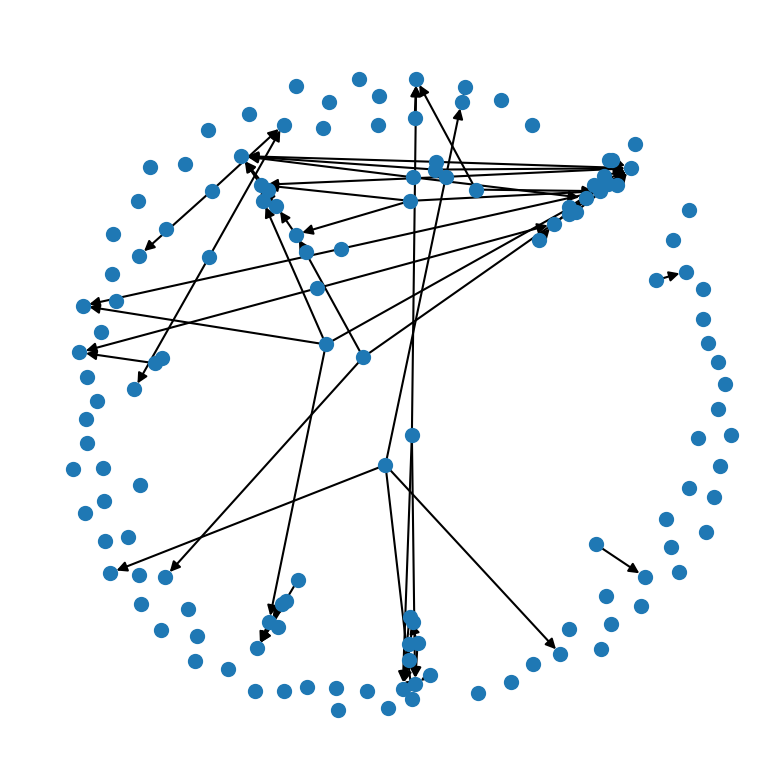

In [11]:
nx.draw(graph, node_size=40)

In [12]:
references_internal_connected = {k:v for (k,v) in references_internal.items() if v}
graph_connected = nx.DiGraph()
for (v1, vs) in references_internal_connected.items():
    for v2 in vs:
        graph_connected.add_edge(v1, v2)

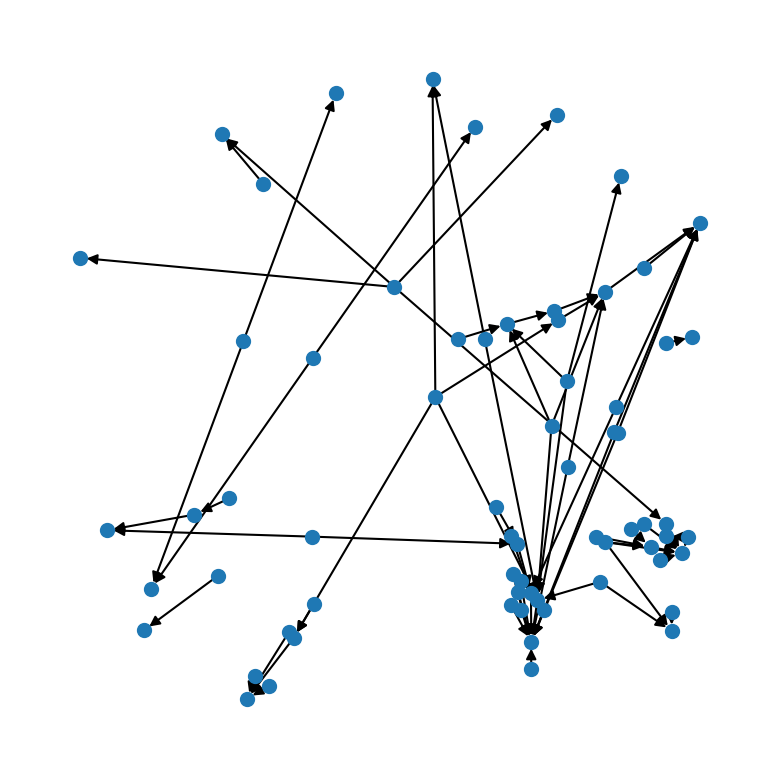

In [13]:
nx.draw(graph_connected, node_size=40)